In [1]:
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook #change for matplotlib inline if plots do not appear

sizeTitle = 24
sizeAxis = 14

# #Cylinder dataset

<IPython.core.display.Javascript object>


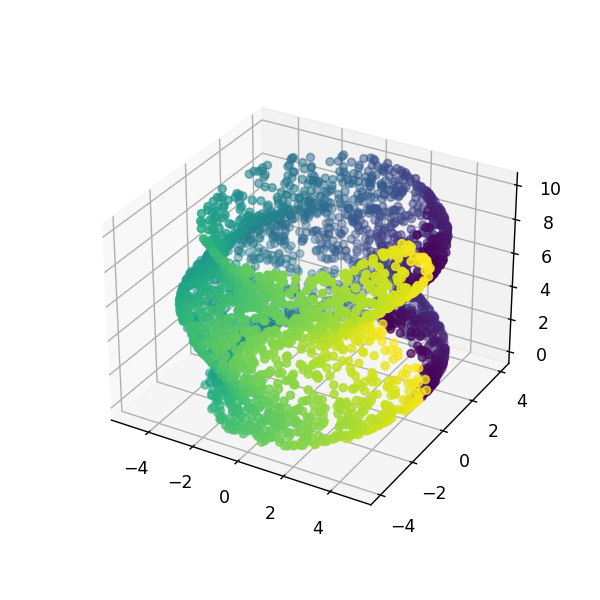

In [2]:
# Generate "cylinder" dataset
N = 3000 # Number of samples
radius = 4
height = 10

# 4 dimensions: x, y, z and color
cylinder = np.empty((N,4))

angle = np.random.rand(1, N) * 2 *np.pi

# Generate sampling grid (x and y)
cylinder[:, 0] = radius * np.cos(angle)
cylinder[:, 1] = radius * np.sin(angle)
cylinder[:, 2] = np.random.rand(1, N) * height

cylinder[:, 0] += np.sin(cylinder[:, 2] / height * 3*np.pi)

# Color is radial
cylinder[:, 3] = angle

# Save data for later use
np.save("cylinder_full", cylinder)

# Visual inspection
fig = plt.figure(figsize = plt.figaspect(1))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter(cylinder[:,0], cylinder[:,1], cylinder[:,2], c=cylinder[:,3])
plt.show()

<IPython.core.display.Javascript object>


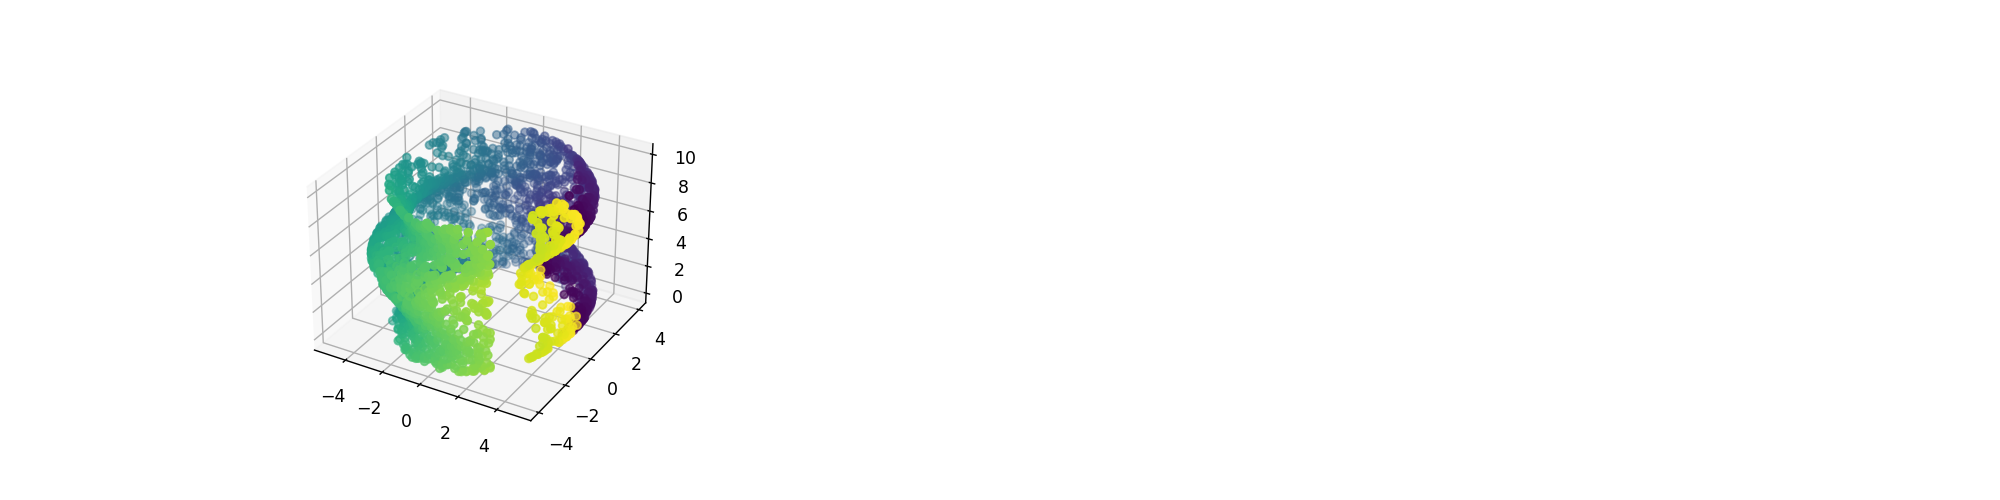

In [3]:
# Create a slit so that the cylinder is easier to unfold
rSorted = np.argsort(np.square(cylinder[:, 0]) + np.square(cylinder[:, 1]))
zSorted = np.argsort(cylinder[:, 2])

phi = np.arctan2(cylinder[:, 1], cylinder[:, 0])
phiSorted = np.argsort(phi)

phiRemove = phiSorted[round(N/2.8):round(N/2.35)]

cylinder_slit = np.delete(cylinder, phiRemove, axis=0)

# Save data for later use
np.save("cylinder", cylinder_slit)

# Visual inspection
fig = plt.figure(figsize = plt.figaspect(0.25))
ax = fig.add_subplot(1, 3, 1, projection='3d')
ax.scatter(cylinder_slit[:,0], cylinder_slit[:,1], cylinder_slit[:,2], c=cylinder_slit[:,3])
plt.show()

# #Twist dataset

<IPython.core.display.Javascript object>


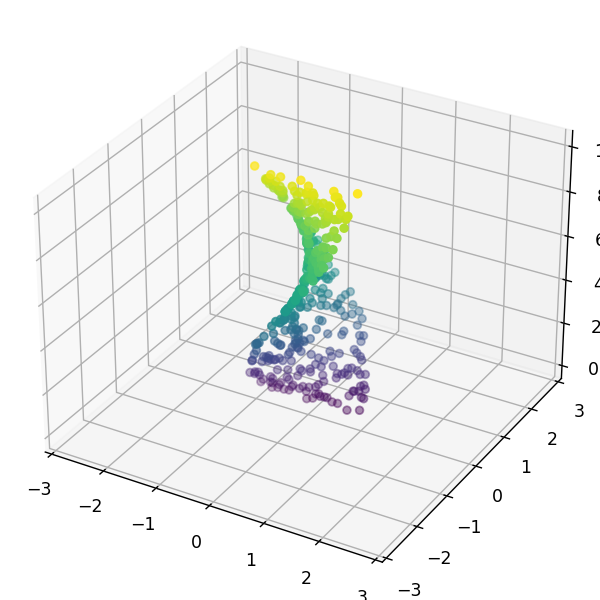

In [4]:
N = 400 # Number of points
width = 2
length = 10

u = np.random.rand(1, N) * length
v = (np.random.rand(1, N) - 0.5) * width

# 4 dimensions: x, y, z and color
twist = np.empty((N,4))

twist[:, 2] = u

twist[:, 0] = np.multiply(np.cos(twist[:, 2] * np.pi / length), v)
twist[:, 1] = np.multiply(np.sin(twist[:, 2] * np.pi / length), v)

# Color = height
twist[:, 3] = twist[:, 2]

# Save data for later use
np.save("twist", twist)

# Visual inspection
fig = plt.figure(figsize = plt.figaspect(1))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter(twist[:,0], twist[:,1], twist[:,2], c=twist[:,3])
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
plt.show()

<IPython.core.display.Javascript object>


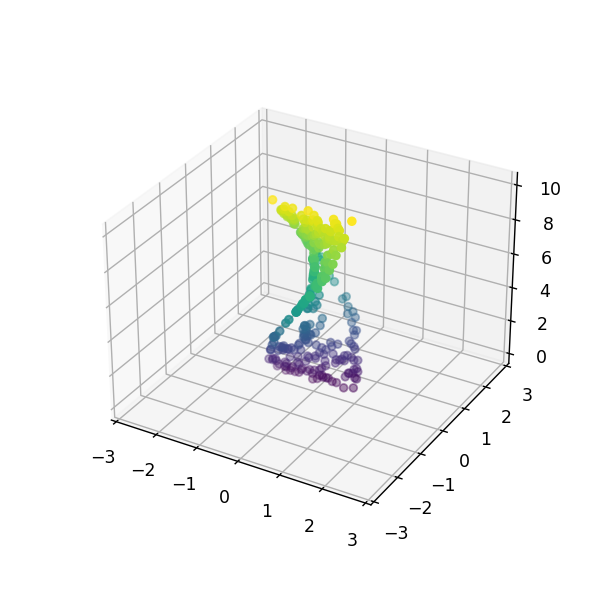

In [5]:
# Let's remove a part
rSorted = np.argsort(np.square(twist[:, 0]) + np.square(twist[:, 1]))
zSorted = np.argsort(twist[:, 2])

rRemove = rSorted[round(N/4):round(3*N/4)]
zRemove = zSorted[round(N/4):round(N*3/4)]

removeIndices = np.intersect1d(rRemove, zRemove)

twistHole = np.delete(twist, removeIndices, axis=0)

fig = plt.figure(figsize = plt.figaspect(1))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter(twistHole[:,0], twistHole[:,1], twistHole[:,2], c=twistHole[:,3])
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.show()

# Save data for later use
np.save("twist_hole", twistHole)